In [4]:
'''
Name: Ananya Singh
Class: CS677
Date: 10/04/2024
Homework Assignment #2
Description of Problem: Given stock data, we need to discover patterns in the stock behavior and we will make predictions on this.
'''

'\nName: Ananya Singh\nClass: CS677\nDate: 10/04/2024\nHomework Assignment #2\nDescription of Problem: Given stock data, we need to discover patterns in the stock behavior and we will make predictions on this.\n'

In [5]:
import pandas as pd
import numpy as np
spy_df = pd.read_csv('SPY.csv')
sbux_df = pd.read_csv('SBUX.csv')
spy_df.head()
sbux_df.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2016-01-04,2016,1,4,Monday,1,2016-01,58.77,58.83,57.60,58.26,13521500,48.89,0.000000,48.8900,48.8900
1,2016-01-05,2016,1,5,Tuesday,1,2016-01,58.79,58.79,57.98,58.65,9617800,49.21,0.006694,49.0500,49.0500
2,2016-01-06,2016,1,6,Wednesday,1,2016-01,57.70,58.53,57.64,58.13,8266300,48.78,-0.008867,48.9600,48.9600
3,2016-01-07,2016,1,7,Thursday,1,2016-01,56.88,57.91,56.16,56.69,11140900,47.57,-0.024772,48.6125,48.6125
4,2016-01-08,2016,1,8,Friday,1,2016-01,57.41,57.73,56.53,56.63,10427000,47.52,-0.001058,48.3940,48.3940


In [6]:
spy_df["True Label"] = np.where(spy_df["Return"] >= 0, '+', '-')
spy_df.head()[["Date", "Return", "True Label"]]

,Date,Return,True Label
0,2016-01-04,0.000000,+
1,2016-01-05,0.001691,+
2,2016-01-06,-0.012614,-
3,2016-01-07,-0.023991,-
4,2016-01-08,-0.010977,-


In [7]:
sbux_df["True Label"] = np.where(sbux_df["Return"] >= 0, '+', '-')
sbux_df.head()[["Date", "Return", "True Label"]]

,Date,Return,True Label
0,2016-01-04,0.000000,+
1,2016-01-05,0.006694,+
2,2016-01-06,-0.008867,-
3,2016-01-07,-0.024772,-
4,2016-01-08,-0.001058,-


In [8]:
training_data_for_spy = spy_df[spy_df["Year"].isin([2016, 2017, 2018])]
size_of_training_data_for_spy = len(training_data_for_spy)
size_of_positive_days_for_spy = len(training_data_for_spy[training_data_for_spy["True Label"] == '+'])
probability_next_day_up_for_spy = size_of_positive_days_for_spy/size_of_training_data_for_spy
print(f"Default probability of up day (p*) for SPY is: {probability_next_day_up_for_spy*100:.2f}%")

Default probability of up day (p*) for SPY is: 55.44%


In [9]:
training_data_for_sbux = sbux_df[sbux_df["Year"].isin([2016, 2017, 2018])]
size_of_training_data_for_sbux = len(training_data_for_sbux)
size_of_positive_days_for_sbux = len(training_data_for_sbux[training_data_for_sbux["True Label"] == '+'])
probability_next_day_up_for_sbux = size_of_positive_days_for_sbux/size_of_training_data_for_sbux
print(f"Default probability of up day (p*) for SBUX is: {probability_next_day_up_for_sbux*100:.2f}%")

Default probability of up day (p*) for SBUX is: 50.93%


In [10]:
labels_for_spy = training_data_for_spy["True Label"].tolist()
labels_for_sbux = training_data_for_sbux["True Label"].tolist()
def calculate_up_after_consecutive_down_days(labels: [], k: int, ticker: str) -> float:
    total_consecutive_down_days_for_k = 0
    down_days_then_up_for_k = 0
    size_of_labels = len(labels)
    
    # iterates through the labels array which stops k positions before the end
    for i in range(size_of_labels-k):
        if_down_pattern = True 
        for j in range(k):
            if labels[i+j] != '-': # ensures all next k days are down 
                if_down_pattern = False
                break # break loop if any day isn't down
        
        if if_down_pattern:
            total_consecutive_down_days_for_k += 1
            if i + k < len(labels) and labels[i+k] == '+': # check if next day is up
                down_days_then_up_for_k += 1
    
    probability = down_days_then_up_for_k / total_consecutive_down_days_for_k if total_consecutive_down_days_for_k > 0 else 0
    print(f"Probability of up day after {k} down days for ticker {ticker} : {probability*100:.2f}%")
    
    return probability

for k in [1, 2, 3]:
    calculate_up_after_consecutive_down_days(labels_for_spy, k, "SPY")
    calculate_up_after_consecutive_down_days(labels_for_sbux, k, "SBUX")

Probability of up day after 1 down days for ticker SPY : 59.52%
Probability of up day after 1 down days for ticker SBUX : 50.00%
Probability of up day after 2 down days for ticker SPY : 59.56%
Probability of up day after 2 down days for ticker SBUX : 49.19%
Probability of up day after 3 down days for ticker SPY : 63.64%
Probability of up day after 3 down days for ticker SBUX : 44.68%


In [11]:
def calculate_up_after_consecutive_up_days(labels: [], k: int, ticker: str) -> float:
    total_consecutive_up_days_for_k = 0
    up_days_then_up_for_k = 0
    size_of_labels = len(labels)
    
    # iterates through the labels array which stops k positions before the end
    for i in range(size_of_labels-k):
        if_up_pattern = True
        for j in range(k):
            if labels[i+j] != '+': # ensures all next k days are up 
                if_up_pattern = False
                break # break loop if any day isn't up
                
        if if_up_pattern:
            total_consecutive_up_days_for_k += 1
            if i + k < len(labels) and labels[i+k] == '+': # check if next day is up
                up_days_then_up_for_k += 1
    
    probability = up_days_then_up_for_k / total_consecutive_up_days_for_k if total_consecutive_up_days_for_k > 0 else 0
    print(f"Probability of up day after {k} up days for ticker {ticker} after consecutive up days is : {probability*100:.2f}%")
    
    return probability
for k in [1, 2, 3]:
    calculate_up_after_consecutive_up_days(labels_for_spy, k, "SPY")
    calculate_up_after_consecutive_up_days(labels_for_sbux, k, "SBUX")


Probability of up day after 1 up days for ticker SPY after consecutive up days is : 52.04%
Probability of up day after 1 up days for ticker SBUX after consecutive up days is : 51.70%
Probability of up day after 2 up days for ticker SPY after consecutive up days is : 50.23%
Probability of up day after 2 up days for ticker SBUX after consecutive up days is : 55.33%
Probability of up day after 3 up days for ticker SPY after consecutive up days is : 46.79%
Probability of up day after 3 up days for ticker SBUX after consecutive up days is : 53.70%


In [14]:
def predicting_labels_by_window(training_labels: [], test_labels: [], W: int, ticker: str, default_probability_up_days: float) -> list:
    size_of_training_labels = len(training_labels)
    size_of_test_labels = len(test_labels) 
    pattern_frequencies = {}
    
    # build pattern frequencies from training data
    for i in range(size_of_training_labels - W):
        pattern = ''.join(training_labels[i:i+W])
        next_day_after_pattern = training_labels[i+W]
        
        if pattern not in pattern_frequencies:
            pattern_frequencies[pattern] = {'+': 0, '-': 0}
        pattern_frequencies[pattern][next_day_after_pattern] += 1
    
    # calculate default probability p* from training data
    default_probability_up_days = training_labels.count('+') / size_of_training_labels
    
    predictions = []
    for i in range(size_of_test_labels - W):
        pattern = ''.join(test_labels[i:i+W])
        
        # if pattern is never seen in training, use default
        if pattern not in pattern_frequencies:
            predictions.append('+' if default_probability_up_days >= 0.5 else '-')
            continue
            
        up_count = pattern_frequencies[pattern]['+']
        down_count = pattern_frequencies[pattern]['-']
        
        if up_count > down_count:
             predictions.append('+')
        elif up_count < down_count:
            predictions.append('-')
        else:
            predictions.append('+' if default_probability_up_days >= 0.5 else '-')
    
    # added NaN padding to match test data length to fix the issue of must have equal len keys and value when setting with an iterable
    full_predictions = [np.nan] * W + predictions
    full_predictions += [np.nan] * (size_of_test_labels - len(full_predictions))
    return full_predictions

for W in [2, 3, 4]:
    spy_training_data = spy_df[spy_df["Year"].isin([2016, 2017, 2018])]["True Label"].tolist()
    spy_test_data = spy_df[spy_df["Year"].isin([2019, 2020])]["True Label"].tolist()
    spy_predictions = predicting_labels_by_window(spy_training_data, spy_test_data, W, "SPY", probability_next_day_up_for_spy)
    spy_df[f'Predicted_Label_W{W}'] = pd.Series(dtype='object')
    test_mask = spy_df['Year'].isin([2019, 2020])
    spy_df.loc[test_mask, f'Predicted_Label_W{W}'] = spy_predictions
    
    sbux_training_data = sbux_df[sbux_df["Year"].isin([2016, 2017, 2018])]["True Label"].tolist()
    sbux_test_data = sbux_df[sbux_df["Year"].isin([2019, 2020])]["True Label"].tolist()
    sbux_predictions = predicting_labels_by_window(sbux_training_data, sbux_test_data, W, "SBUX", probability_next_day_up_for_sbux)
    sbux_df[f'Predicted_Label_W{W}'] = pd.Series(dtype='object')
    test_mask = sbux_df['Year'].isin([2019, 2020])
    sbux_df.loc[test_mask, f'Predicted_Label_W{W}'] = sbux_predictions
    
# plug in your options here for testing purposes
print("\nSample predictions for SPY (2019):")
print(spy_df[spy_df['Year'] == 2019][['Date', 'Predicted_Label_W2', 'Predicted_Label_W3', 'Predicted_Label_W4']].head(40))


Sample predictions for SPY (2020):
            Date Predicted_Label_W2 Predicted_Label_W3 Predicted_Label_W4
1006  2020-01-02                  +                  +                  +
1007  2020-01-03                  +                  +                  +
1008  2020-01-06                  +                  +                  +
1009  2020-01-07                  +                  +                  -
1010  2020-01-08                  +                  +                  +
1011  2020-01-09                  +                  +                  +
1012  2020-01-10                  +                  +                  +
1013  2020-01-13                  +                  +                  +
1014  2020-01-14                  +                  +                  -
1015  2020-01-15                  +                  +                  +
1016  2020-01-16                  +                  +                  +
1017  2020-01-17                  +                  +                  +
10

In [19]:
print("\nSample predictions for SBUX (2020):")
print(sbux_df[sbux_df['Year'] == 2020][['Date', 'Predicted_Label_W2', 'Predicted_Label_W3', 'Predicted_Label_W4']].head(40))


Sample predictions for SBUX (2020):
            Date Predicted_Label_W2 Predicted_Label_W3 Predicted_Label_W4
1006  2020-01-02                  -                  -                  -
1007  2020-01-03                  +                  +                  +
1008  2020-01-06                  +                  +                  +
1009  2020-01-07                  -                  +                  +
1010  2020-01-08                  -                  -                  -
1011  2020-01-09                  -                  +                  +
1012  2020-01-10                  +                  +                  +
1013  2020-01-13                  +                  +                  +
1014  2020-01-14                  -                  -                  -
1015  2020-01-15                  +                  -                  +
1016  2020-01-16                  -                  -                  -
1017  2020-01-17                  +                  +                  +
1

In [20]:
def calculate_accuracy(df, W) -> float:
    test_data = df[df['Year'].isin([2019, 2020])].copy()
    correct = 0
    total = 0
    
    for index, row in test_data.iterrows():
        true_label = row['True Label']
        prediction_label = row[f'Predicted_Label_W{W}']
        
        # only count not NaN predictions
        if pd.notna(prediction_label):
            total += 1
            if true_label == prediction_label:
                correct += 1
    
    accuracy = (correct / total) * 100
    
    print(f"\nResults for W={W}:")
    print(f"Correct predictions: {correct}")
    print(f"Total predictions: {total}")
    print(f"Accuracy: {accuracy:.2f}%")
    
    return accuracy

print("SPY Results:")
spy_results = {}
for w in [2, 3, 4]:
    spy_results[w] = calculate_accuracy(spy_df, w)

print("-"*50)

print("SBUX Results:")    
sbux_results = {}
for w in [2, 3, 4]:
    sbux_results[w] = calculate_accuracy(sbux_df, w)

SPY Results:

Results for W=2:
Correct predictions: 294
Total predictions: 502
Accuracy: 58.57%

Results for W=3:
Correct predictions: 293
Total predictions: 501
Accuracy: 58.48%

Results for W=4:
Correct predictions: 289
Total predictions: 500
Accuracy: 57.80%
--------------------------------------------------
SBUX Results:

Results for W=2:
Correct predictions: 248
Total predictions: 502
Accuracy: 49.40%

Results for W=3:
Correct predictions: 240
Total predictions: 501
Accuracy: 47.90%

Results for W=4:
Correct predictions: 254
Total predictions: 500
Accuracy: 50.80%


In [21]:
def ensemble_predictions(df):
    test_years = [2019, 2020]
    test_data = df[df['Year'].isin(test_years)].copy()
    ensemble_labels = []
    
    for idx, row in test_data.iterrows():
        # skip if we don't have valid predictions
        if pd.isna(row['Predicted_Label_W2']):
            ensemble_labels.append(np.nan)
            continue
    
        positive_count = 0
        for W in [2, 3, 4]:
            if row[f'Predicted_Label_W{W}'] == '+':
                positive_count += 1
        
        if positive_count < 2:
            ensemble_labels.append('-')
        else:
            ensemble_labels.append('+')
            
    test_data['Ensemble_Label'] = ensemble_labels
    return test_data 

spy_df_with_ensemble = ensemble_predictions(spy_df)
sbux_df_with_ensemble = ensemble_predictions(sbux_df)

print("Sample predictions for SPY:")
spy_df_with_ensemble[spy_df_with_ensemble['Year'].isin([2019, 2020])][['Date', 'Predicted_Label_W2', 'Predicted_Label_W3', 'Predicted_Label_W4', 'Ensemble_Label']].head(40)

Sample predictions for SPY:


,Date,Predicted_Label_W2,Predicted_Label_W3,Predicted_Label_W4,Ensemble_Label
754,2019-01-02,NaN,NaN,NaN,NaN
755,2019-01-03,NaN,NaN,NaN,NaN
756,2019-01-04,+,NaN,NaN,-
757,2019-01-07,+,+,NaN,+
758,2019-01-08,+,+,+,+
759,2019-01-09,+,-,-,-
760,2019-01-10,+,-,+,+
761,2019-01-11,+,-,+,+
762,2019-01-14,+,-,+,+
763,2019-01-15,+,+,+,+


In [22]:
print("Sample predictions for SBUX:")
sbux_df_with_ensemble[sbux_df_with_ensemble['Year'].isin([2019, 2020])][['Date', 'Predicted_Label_W2', 'Predicted_Label_W3', 'Predicted_Label_W4', 'Ensemble_Label']].head(40)

Sample predictions for SBUX:


,Date,Predicted_Label_W2,Predicted_Label_W3,Predicted_Label_W4,Ensemble_Label
754,2019-01-02,NaN,NaN,NaN,NaN
755,2019-01-03,NaN,NaN,NaN,NaN
756,2019-01-04,-,NaN,NaN,-
757,2019-01-07,-,+,NaN,-
758,2019-01-08,+,+,+,+
759,2019-01-09,+,+,+,+
760,2019-01-10,+,+,-,+
761,2019-01-11,+,+,-,+
762,2019-01-14,+,+,-,+
763,2019-01-15,-,+,+,+


In [23]:
def calculate_accuracies(df) -> float:
    # check for valid predictions across all W values used in ensemble
    test_years = [2019, 2020]
    test_data = df[df['Year'].isin(test_years)]
    
    valid_predictions = test_data[
        pd.notna(test_data['Predicted_Label_W2']) & 
        pd.notna(test_data['Predicted_Label_W3']) & 
        pd.notna(test_data['Predicted_Label_W4']) &
        pd.notna(test_data['Ensemble_Label'])
    ]
    
    total_predictions = len(valid_predictions)
    
    correct_predictions = 0
    for idx, row in valid_predictions.iterrows():
        if row['Ensemble_Label'] == row['True Label']:
            correct_predictions += 1
            
    # calculate separate accuracies for positive and negative labels
    positive_predictions = valid_predictions[valid_predictions['True Label'] == '+']
    negative_predictions = valid_predictions[valid_predictions['True Label'] == '-']
    
    positive_correct = 0
    for idx, row in positive_predictions.iterrows():
        if row['Ensemble_Label'] == row['True Label']:
            positive_correct += 1
            
    negative_correct = 0
    for idx, row in negative_predictions.iterrows():
        if row['Ensemble_Label'] == row['True Label']:
            negative_correct += 1
    
    return (correct_predictions / total_predictions) * 100

spy_df_with_ensemble = ensemble_predictions(spy_df)
print("SPY Ensemble Results:")
spy_ensemble = calculate_accuracies(spy_df_with_ensemble)
print(f"Overall Accuracy: {spy_ensemble:.2f}%")

SPY Ensemble Results:
Overall Accuracy: 58.80%


In [24]:
sbux_df_with_ensemble = ensemble_predictions(sbux_df)
print("SBUX Ensemble Results:")
sbux_ensemble = calculate_accuracies(sbux_df_with_ensemble)
print(f"Overall Accuracy: {sbux_ensemble:.2f}%")


SBUX Ensemble Results:
Overall Accuracy: 48.40%


In [25]:
def calculate_metrics(df, prediction_column):
    # filter rows where both the prediction and true label are not NaN
    valid_data = df.dropna(subset=['True Label', prediction_column])
    
    true_positive = sum((valid_data['True Label'] == '+') & (valid_data[prediction_column] == '+'))
    false_positive = sum((valid_data['True Label'] == '-') & (valid_data[prediction_column] == '+'))
    true_negative = sum((valid_data['True Label'] == '-') & (valid_data[prediction_column] == '-'))
    false_negative = sum((valid_data['True Label'] == '+') & (valid_data[prediction_column] == '-'))
    
    if (true_positive + false_negative) > 0:
        true_positive_rate = true_positive / (true_positive + false_negative)
    else:
        true_positive_rate = 0
    if (true_negative + false_positive) > 0:
        true_negative_rate = true_negative / (true_negative + false_positive)
    else:
        true_negative_rate = 0
        
    if (true_positive + false_positive + true_negative + false_negative) > 0:
        accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)
    else:
        accuracy = 0
    
    return true_positive, false_positive, true_negative, false_negative, accuracy, true_positive_rate, true_negative_rate

In [28]:
def create_statistics_table(df_with_ensemble, ticker):
    statistics_table = []
    
    for W in [2, 3, 4, 'ensemble']:
        pred_column = 'Ensemble_Label' if W == 'ensemble' else f'Predicted_Label_W{W}'
        tp, fp, tn, fn, accuracy, tpr, tnr = calculate_metrics(df_with_ensemble, pred_column)
        statistics_table.append([W, tp, fp, tn, fn, accuracy, tpr, tnr])
    
    results_df = pd.DataFrame(
        statistics_table, 
        columns=['W', 'TP', 'FP', 'TN', 'FN', 'Accuracy', 'TPR', 'TNR']
    )
    return results_df

# Usage:
spy_results = create_statistics_table(spy_df_with_ensemble, 'SPY')
sbux_results = create_statistics_table(sbux_df_with_ensemble, 'SBUX')

In [31]:
print('SPY statistics:')
spy_results.head()

SPY statistics:


,W,TP,FP,TN,FN,Accuracy,TPR,TNR
0,2,294,208,0,0,0.585657,1.000000,0.000000
1,3,245,160,48,48,0.584830,0.836177,0.230769
2,4,235,154,54,57,0.578000,0.804795,0.259615
3,ensemble,270,183,25,24,0.587649,0.918367,0.120192


In [257]:
print('SBUX statistics:')
print(sbux_results)

SBUX statistics:
          W   TP   FP   TN   FN  Accuracy       TPR       TNR
0         2  150  126   98  128  0.494024  0.539568  0.437500
1         3  172  156   68  105  0.479042  0.620939  0.303571
2         4  143  113  111  133  0.508000  0.518116  0.495536
3  ensemble  174  156   68  104  0.482072  0.625899  0.303571


In [32]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_portfolio_growth(df, ticker, W):
    initial_investment=100
    data = df[df['Year'].isin([2019, 2020])].copy()
    
    data_with_ensemble = ensemble_predictions(df)
    data['Ensemble_Label'] = data_with_ensemble['Ensemble_Label']

    data['Date'] = pd.to_datetime(data['Date'])
    start_date = data['Date'].iloc[0]
    end_date = data['Date'].iloc[-1] 
    
    buy_and_hold_value = [initial_investment]
    for daily_return in data['Return']:
        new_value = buy_and_hold_value[-1] * (1 + daily_return)
        buy_and_hold_value.append(new_value)
        
    ensemble_portfolio_value = [initial_investment]
    for daily_return, prediction in zip(data['Return'], data['Ensemble_Label']):
        if prediction == '+':
            new_value = ensemble_portfolio_value[-1] * (1 + daily_return)
        else:
            new_value = ensemble_portfolio_value[-1]
        ensemble_portfolio_value.append(new_value)

    predicted_portfolio_value = [initial_investment]
    for daily_return, prediction in zip(data['Return'], data[f'Predicted_Label_W{W}']):
        if prediction == '+':  # Update only on positive predictions
            new_value = predicted_portfolio_value[-1] * (1 + daily_return)
        else:
            new_value = predicted_portfolio_value[-1]
        predicted_portfolio_value.append(new_value)
    
    
    plt.figure(figsize=(20, 10))
    plt.plot(data['Date'], buy_and_hold_value[1:], label='Buy-and-Hold Strategy', 
             linestyle='-', color='yellow')
    plt.plot(data['Date'], ensemble_portfolio_value[1:], label='Ensemble Strategy', 
             linestyle=':', color='red', marker='^', markersize=2)
    plt.plot(data['Date'], predicted_portfolio_value[1:], label=f'Predicted Strategy (W={W})', 
             linestyle='--', color='purple', marker='o', markersize=2)
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.xlim(start_date, end_date)
    
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.title(f'{ticker} Portfolio Growth (2019-2020)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

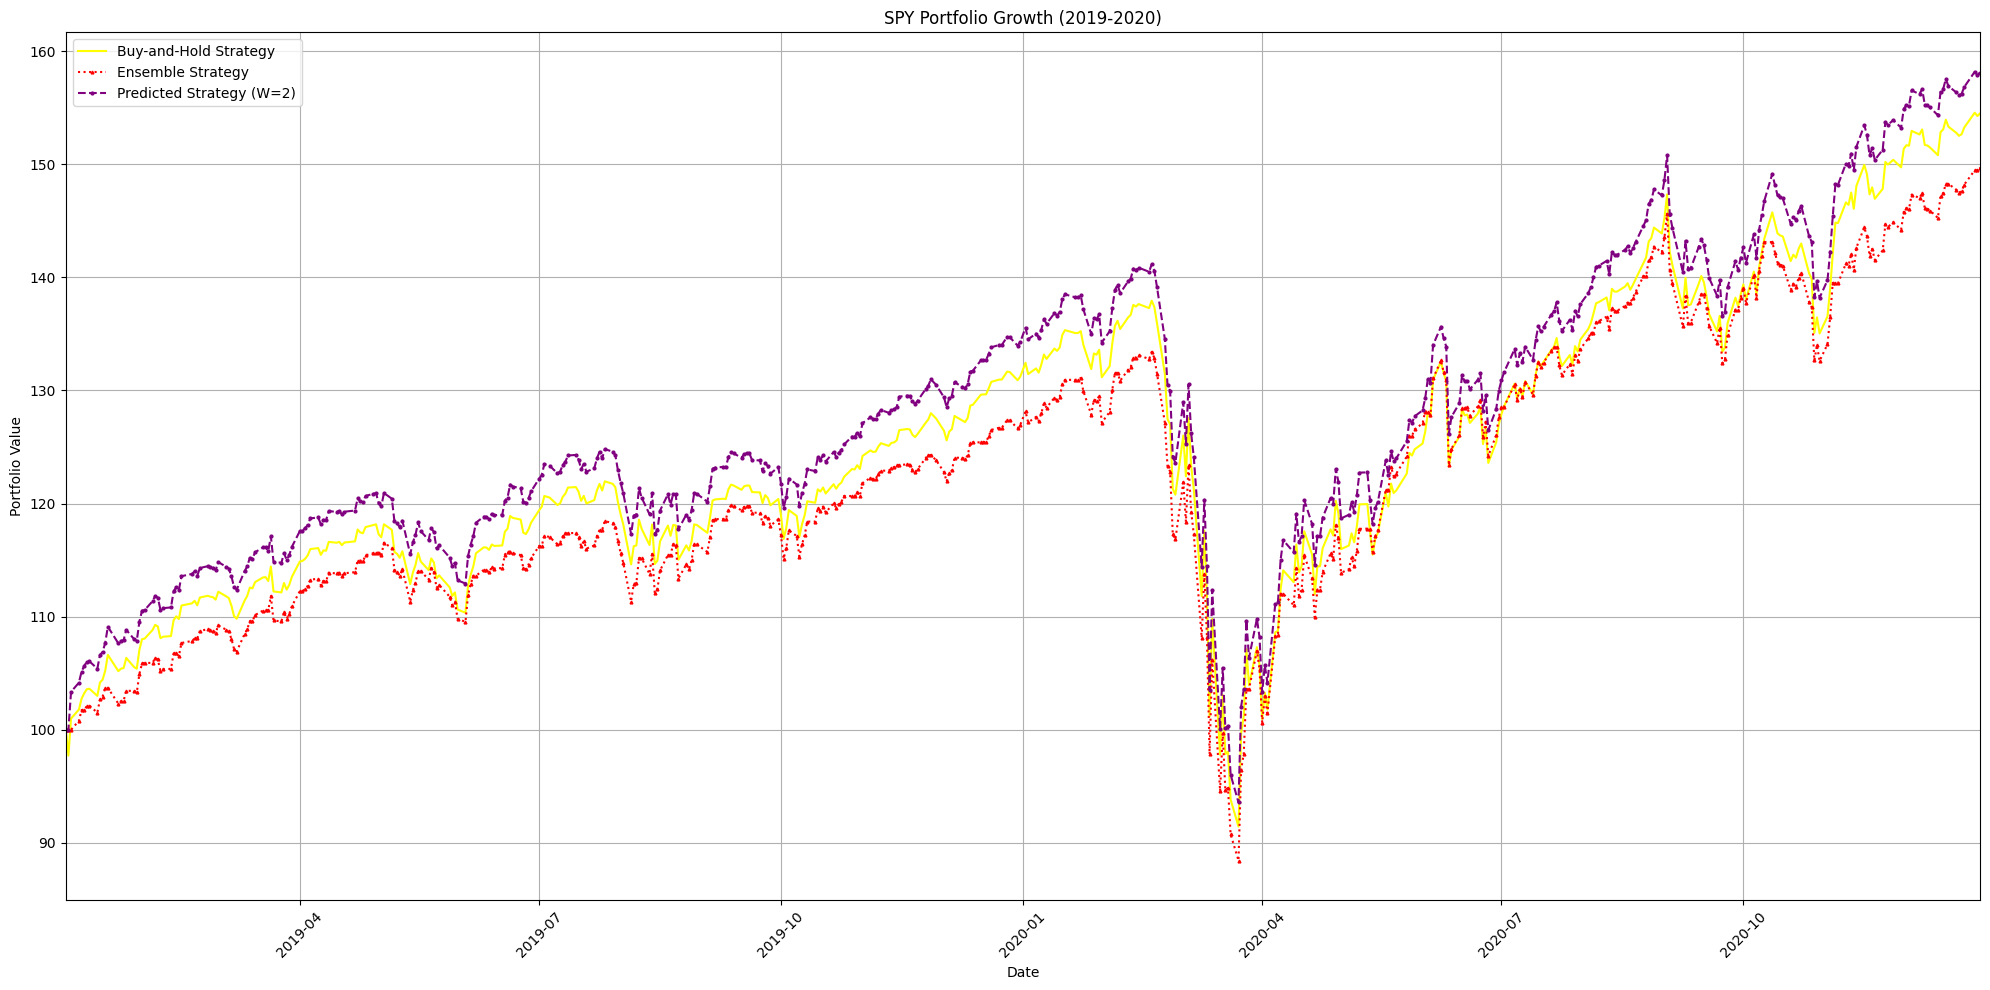

In [33]:
plot_portfolio_growth(spy_df, 'SPY', 2)

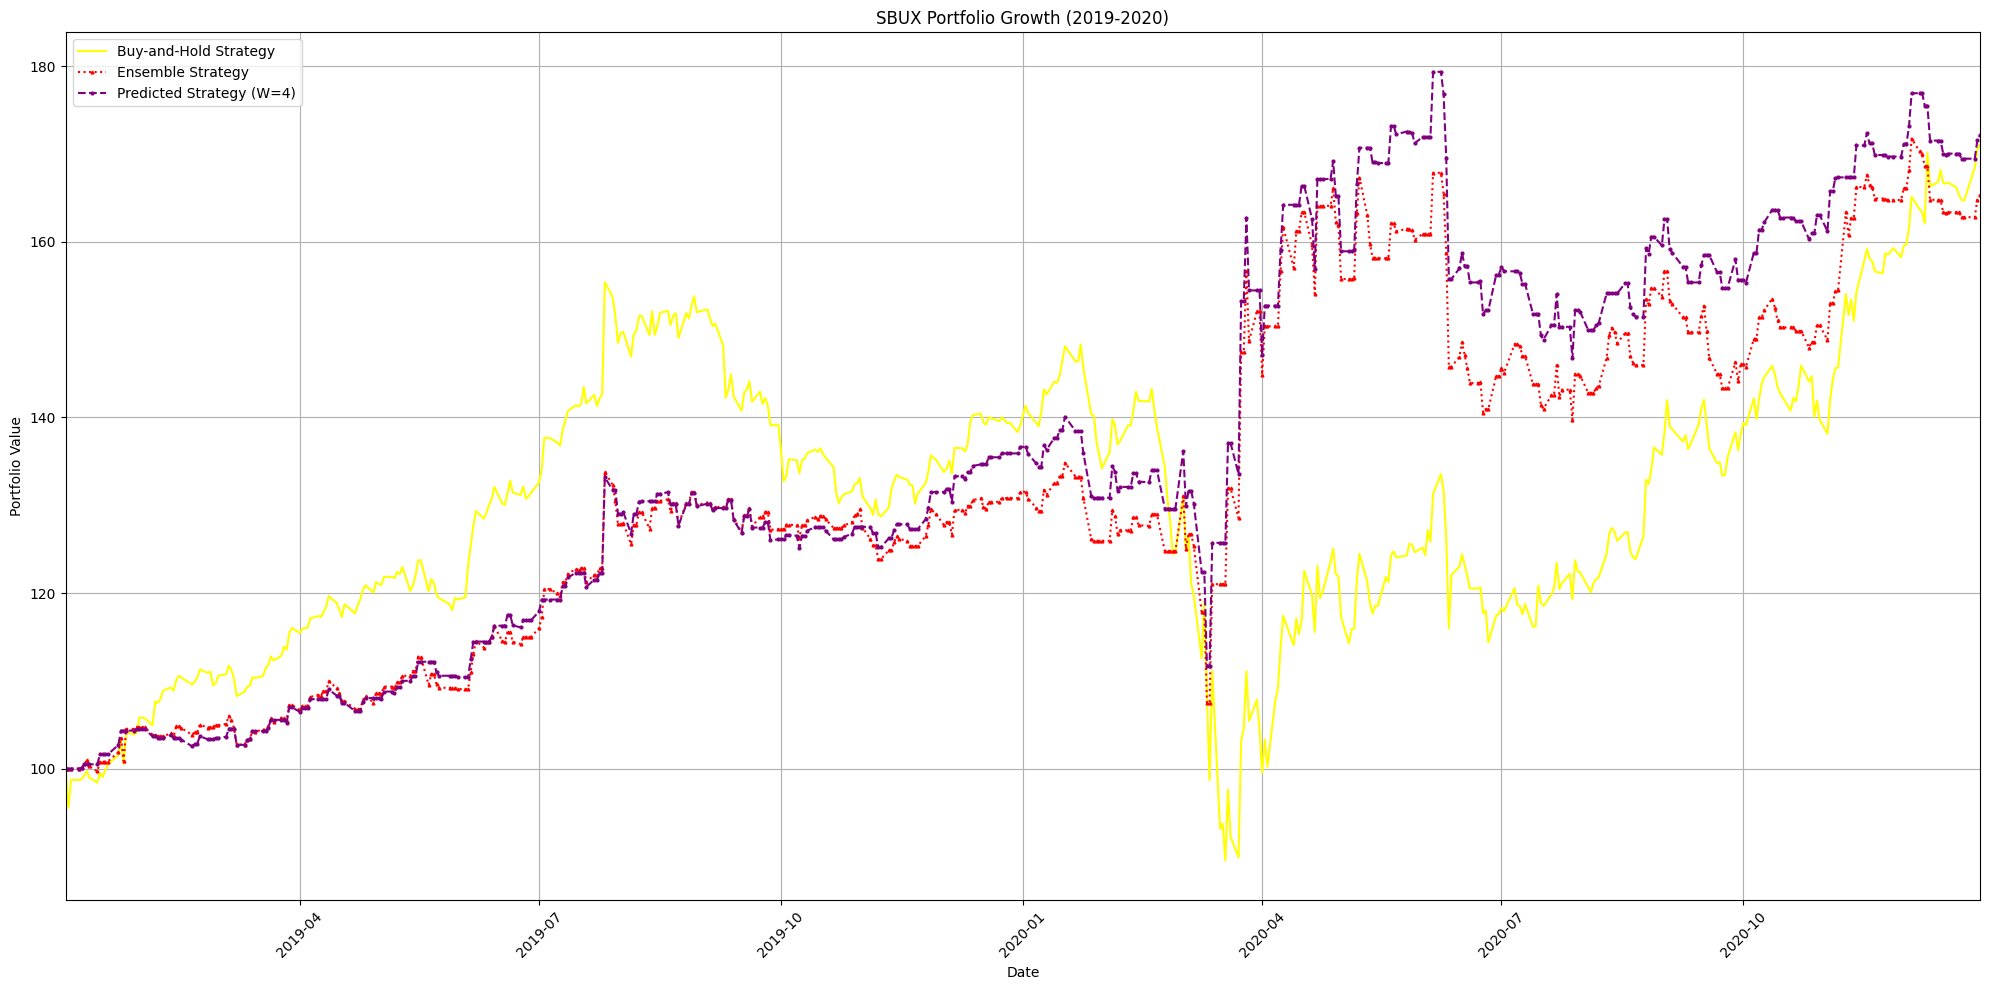

In [34]:
plot_portfolio_growth(sbux_df, 'SBUX', 4)